In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
games_all_data_df = pd.read_csv("./data/all_teams.csv")

In [4]:
#just wants stats from full games
games_df = games_all_data_df[(games_all_data_df["situation"] == "all") & (games_all_data_df["playoffGame"] == 0)].copy()
games_df["game_date"] = pd.to_datetime(games_df["gameDate"], format="%Y%m%d")
games_df["year"] = games_df["game_date"].dt.year
games_df["month"] = games_df["game_date"].dt.month
games_df["day"] = games_df["game_date"].dt.day
#filter out one regular season game played in May
#It was a makeup game. No other games played in May
games_df = games_df[(games_df["month"] != 5) & (games_df['home_or_away'] == 'HOME')]

In [5]:
start_date = games_df['game_date'].min()
end_date = games_df['game_date'].max()
print(f"Data start: {start_date}")
print(f"Data end: {end_date}")

Data start: 2008-10-04 00:00:00
Data end: 2025-11-16 00:00:00


In [6]:
def applySeason(data_row):
    #season runs Sept-June
    year = data_row['year']
    if(data_row['month'] < 8):
        return f"{year-1}-{year}"
    else:
        return f"{year}-{year+1}"
    
games_df['season'] = games_df.apply(applySeason, axis=1)

In [7]:
##2012-2013, 2019-2020, 2020-2021 shortened seasons. filtering out for analysis
filter_seasons = ['2012-2013', '2019-2020', '2020-2021']
games_df = games_df[~games_df['season'].isin(filter_seasons)]

In [8]:
games_df['totalGoals'] = games_df["goalsFor"] + games_df["goalsAgainst"]

In [9]:
goals_per_game_by_season = games_df.groupby("season")["totalGoals"].mean()
print(goals_per_game_by_season)

season
2008-2009    5.695192
2009-2010    5.532140
2010-2011    5.464228
2011-2012    5.337258
2013-2014    5.345669
2014-2015    5.324390
2015-2016    5.337398
2016-2017    5.450407
2017-2018    5.860740
2018-2019    5.961448
2021-2022    6.211289
2022-2023    6.286585
2023-2024    6.163110
2024-2025    6.022104
2025-2026    6.106667
Name: totalGoals, dtype: float64


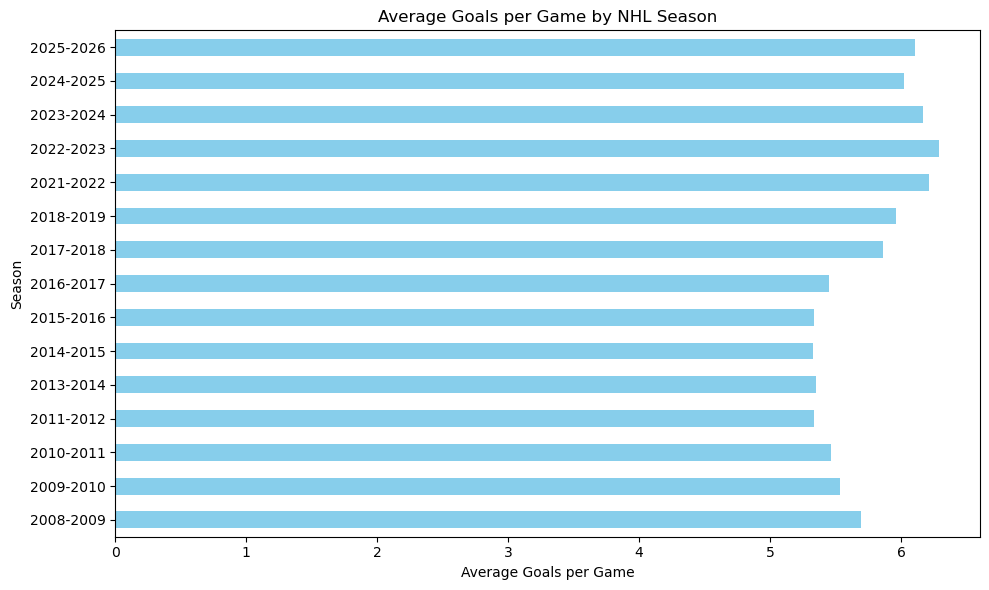

In [10]:
plt.figure(figsize=(10, 6))
goals_per_game_by_season.plot(kind='barh', color='skyblue')
plt.xlabel('Average Goals per Game')
plt.ylabel('Season')
plt.title('Average Goals per Game by NHL Season')
plt.tight_layout()
plt.show()

In [11]:
goals_per_game_by_month = games_df.groupby("month")["totalGoals"].mean()
print(goals_per_game_by_month)

month
1     5.690011
2     5.729902
3     5.738896
4     5.898944
10    5.810021
11    5.649734
12    5.705943
Name: totalGoals, dtype: float64


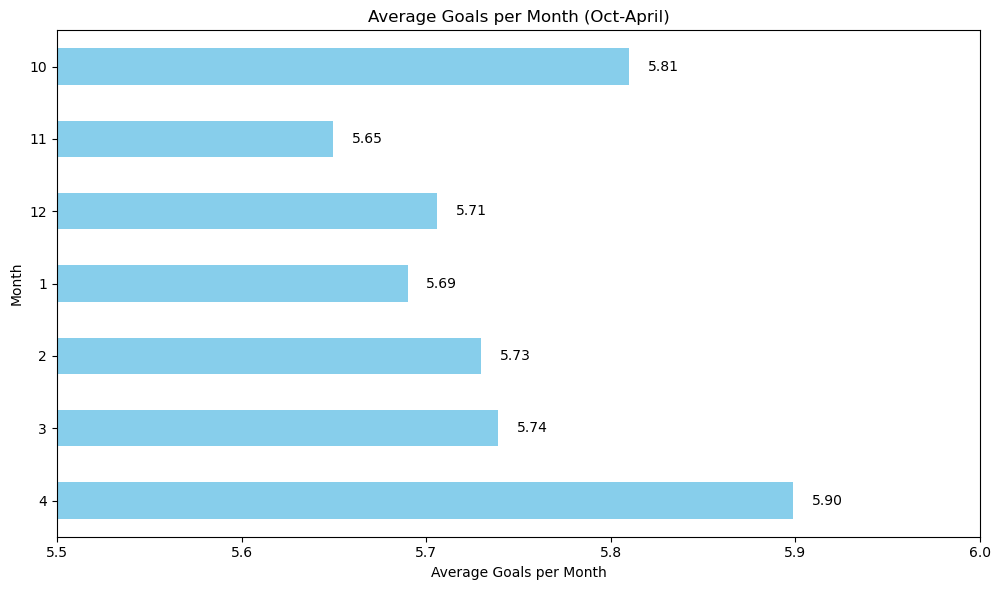

In [12]:
month_order = [10, 11, 12, 1, 2, 3, 4]
ordered_goals_per_game_by_month = goals_per_game_by_month.loc[month_order]

plt.figure(figsize=(10, 6))
ax = ordered_goals_per_game_by_month.plot(kind='barh', color='skyblue')
plt.xlabel('Average Goals per Month')
plt.ylabel('Month')
plt.title('Average Goals per Month (Oct-April)')
plt.tight_layout()
plt.gca().invert_yaxis()  # Reverse y-axis so 10 is at the top
plt.xlim(5.5, 6.0)

# Add value labels to bars
for i, v in enumerate(ordered_goals_per_game_by_month):
    ax.text(v + 0.01, i, f"{v:.2f}", va='center', color='black', fontsize=10)

plt.show()

In [13]:
avg_scoring_by_season_month = games_df.groupby(["season","month"])["totalGoals"].mean()

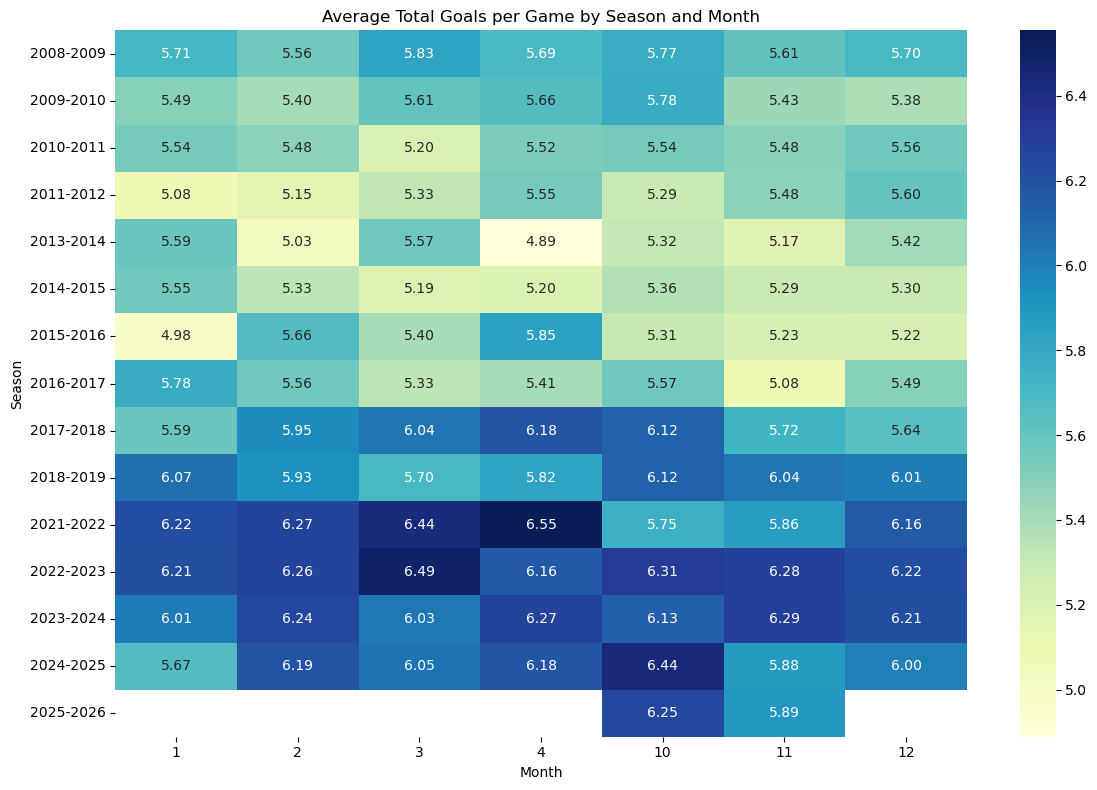

In [14]:
import seaborn as sns

# Pivot the grouped data for heatmap
heatmap_data = avg_scoring_by_season_month.unstack("month")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Total Goals per Game by Season and Month")
plt.xlabel("Month")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

In [15]:
def calc_diff_score_for_month(month):
    month_games = games_df[games_df['month'] == month]
    month_games_avg_goals = month_games['totalGoals'].mean()
    all_other_months = games_df[games_df['month'] != 10]
    all_other_months_avg_goals = all_other_months['totalGoals'].mean()
    scoring_diff = month_games_avg_goals - all_other_months_avg_goals
    print(f"Scoring diff {month}: {scoring_diff:.2f} goals")
    return scoring_diff

months = [10, 11, 12, 1, 2, 3, 4]

for month in months:
    calc_diff_score_for_month(month)


Scoring diff 10: 0.09 goals
Scoring diff 11: -0.07 goals
Scoring diff 12: -0.01 goals
Scoring diff 1: -0.03 goals
Scoring diff 2: 0.01 goals
Scoring diff 3: 0.02 goals
Scoring diff 4: 0.18 goals
